## Step 3: Deploy model

Import the trained model. Then continue to process the data and put it into the model for prediction

In [7]:
# # Import the necessary libraries for predicting
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
# Load model
loaded_model = load_model('EfficientNetB3_acc96.h5')

In [12]:
# Choose image from Predict_Image folder
image_path = "./Predict_Image/girl5.jpg"

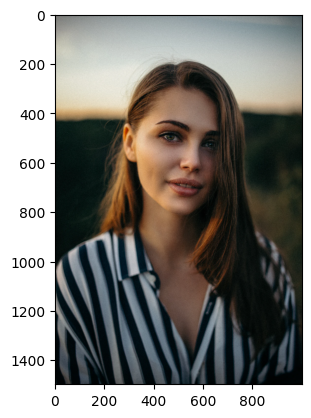

In [13]:
# Display and pre-precess image into 64x64 size
with Image.open(image_path) as image:
    plt.imshow(image)
    img_resize = image.resize((64, 64))
    img_array = np.array(img_resize, dtype="uint8")
    img_array_3d = img_array[..., :3]
    img_array_3d

In [14]:
# fit data into model to predict
predictions = loaded_model.predict(img_array_3d)

2/2 [==============================] - 3s 33ms/step


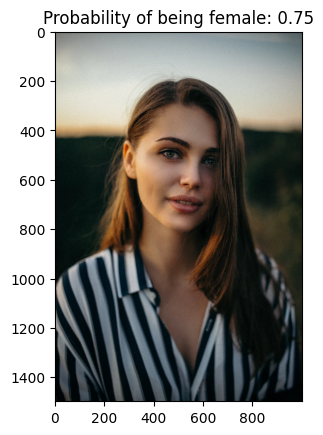

In [15]:
# Display predicted rate
threshhold = 0.5
if predictions[0][0] > threshhold:
    with Image.open(image_path) as image:
        plt.imshow(image)
        plt.title(f"Probability of being female: {predictions[0][0]:.2f}")
else:
    with Image.open(image_path) as image:
        plt.imshow(image)
        plt.title(f"Probability of being male: {1 - predictions[0][0]:.2f}")